In [1]:
import os 
import sys

running_path = "/Odyssey/private/o23gauvr/code/FASCINATION/"
os.chdir(running_path)
sys.path.insert(0,running_path)

In [2]:
import os
from pathlib import Path
from tqdm import tqdm
import torch
import hydra
import matplotlib.pyplot as plt
import numpy as np
import src.utils as utils 

from sklearn.decomposition import PCA



In [3]:
plt.style.use('ggplot')
cmap = plt.get_cmap('viridis')

In [4]:
gpu = 0
    
if torch.cuda.is_available() and gpu is not None:
##This may not be necessary outside the notebook
    dev = f"cuda:{gpu}"
else:
    dev = "cpu"

device = torch.device(dev)

In [5]:
try:
    if dm_dict:
        print("Not reloading datamodule")

except:
    
    dm_dict = {}
    pca_dict = {}
    n_components = 0
    print("Initializing datamodule")

Initializing datamodule


In [6]:

def plot_profile(truth_profile,
                 ae_profile,
                 pca_profile, 
                 depth_array,
                 depth_components,
                 coords):    


    date,lat,lon = coords 
    cr = depth_array.size/depth_components

    fig,axs = plt.subplots(1,3,figsize=(23,6), gridspec_kw={'width_ratios': [1, 1, 1]})

    axs[0].plot(truth_profile, depth_array, c = "navy")  
    axs[1].plot(pca_profile, depth_array, c="navy")
    axs[2].plot(ae_profile, depth_array, c ="navy")


    ecs_truth_idx = np.argmax(truth_profile,axis=0)
    ecs_truth = depth_array[ecs_truth_idx]
    
    ecs_pca_idx = np.argmax(pca_profile,axis=0)
    ecs_pca = depth_array[ecs_pca_idx]
    
    ecs_ae_idx = np.argmax(ae_profile,axis=0)
    ecs_ae = depth_array[ecs_ae_idx]


    xmin, xmax = axs[0].get_xlim()
    axs[0].hlines(ecs_truth, xmin=xmin, xmax=xmax, label = f"ECS={int(ecs_truth)}m", colors = "coral")
    
    xmin, xmax = axs[1].get_xlim()
    axs[1].hlines(ecs_pca, xmin=xmin, xmax=xmax, label = f"ECS={int(ecs_pca)}m", colors = "coral")

    xmin, xmax = axs[2].get_xlim()
    axs[2].hlines(ecs_ae, xmin=xmin, xmax=xmax, label = f"ECS={int(ecs_ae)}m", colors = "coral")




    for ax in axs[:]:

        ax.legend(loc = "lower right")
        ax.set_xlabel("Sound Speed (°)")
        
        ax.invert_yaxis() 
        

    
    axs[0].set_title("Ground truth", fontsize = 10)
    axs[1].set_title(f"PCA reconstruction\nRMSE={np.sqrt(np.mean((truth_profile-pca_profile)**2)):.8f}m", fontsize = 10)
    axs[2].set_title(f"AE reconstruction\nRMSE={np.sqrt(np.mean((truth_profile-ae_profile)**2)):.8f}m", fontsize = 10)



    axs[0].set_ylabel('Depth (m)')


    date = np.datetime64(date, 'D')
    fig.suptitle(f"Sound Speed Profiles reconstruction\ndate: {date}, lat: {np.round(lat,2)}, lon: {np.round(lon,2)}\n depth components: {depth_components}, cr: {np.round(cr,2)}", x=0.5, y=1.05)
    
    


In [8]:
base_dir = "outputs/visualisation/1D" 
base_dir = "/Odyssey/private/o23gauvr/code/FASCINATION/outputs/visualisation/plot_1D/"
# Initialize an empty dictionary
ckpt_dict = {}

# List the first-level directories in the base directory
first_level_dirs = next(os.walk(base_dir))[1]

# Iterate through the first-level directories
for dir_name in first_level_dirs:
    if dir_name == "mute":
        continue
    # Create the relative path
    relative_path = os.path.join(base_dir, dir_name)
    # Add to the dictionary
    ckpt_dict[dir_name] = relative_path

# Print the dictionary
print(ckpt_dict)

{'1D_6_epochs': '/Odyssey/private/o23gauvr/code/FASCINATION/outputs/visualisation/plot_1D/1D_6_epochs', '1D_30_epochs': '/Odyssey/private/o23gauvr/code/FASCINATION/outputs/visualisation/plot_1D/1D_30_epochs', '1D_30_epochs_grad_1': '/Odyssey/private/o23gauvr/code/FASCINATION/outputs/visualisation/plot_1D/1D_30_epochs_grad_1'}


  0%|          | 0/1 [00:00<?, ?it/s]


 Odyssey private o23gauvr code FASCINATION outputs visualisation plot  1D 1D  6  epochs checkpoints val  loss=0.74-epoch=05.ckpt
Initiating datamodule; Generating train and test datasets
Loading model, generating AE output


/Odyssey/private/o23gauvr/miniforge3/envs/fsc_env/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:541: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Fitting PCA


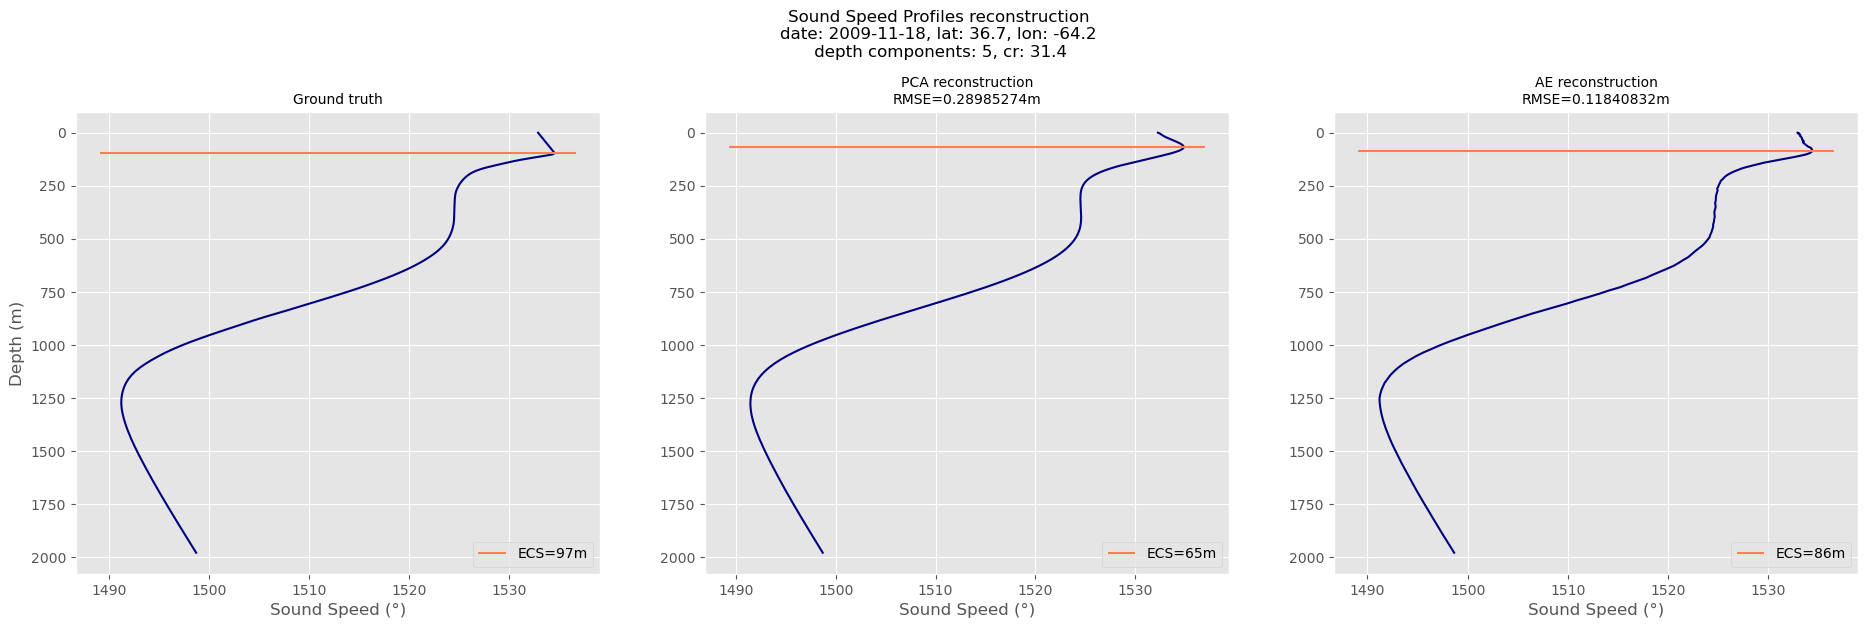

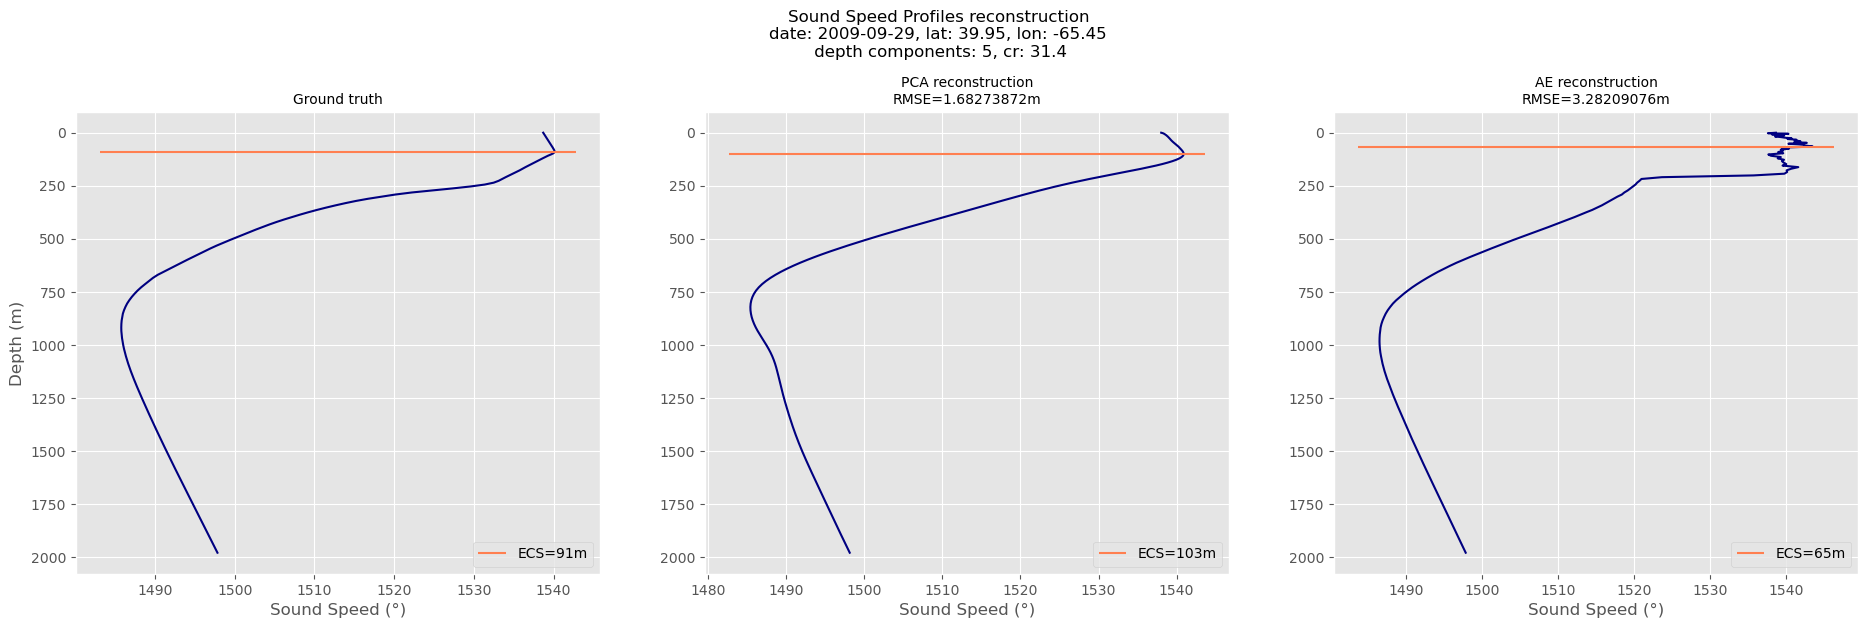

  0%|          | 0/1 [00:00<?, ?it/s]


 Odyssey private o23gauvr code FASCINATION outputs visualisation plot  1D 1D  30  epochs checkpoints val  loss=0.27-epoch=25.ckpt
Loading model, generating AE output


/Odyssey/private/o23gauvr/miniforge3/envs/fsc_env/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:541: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


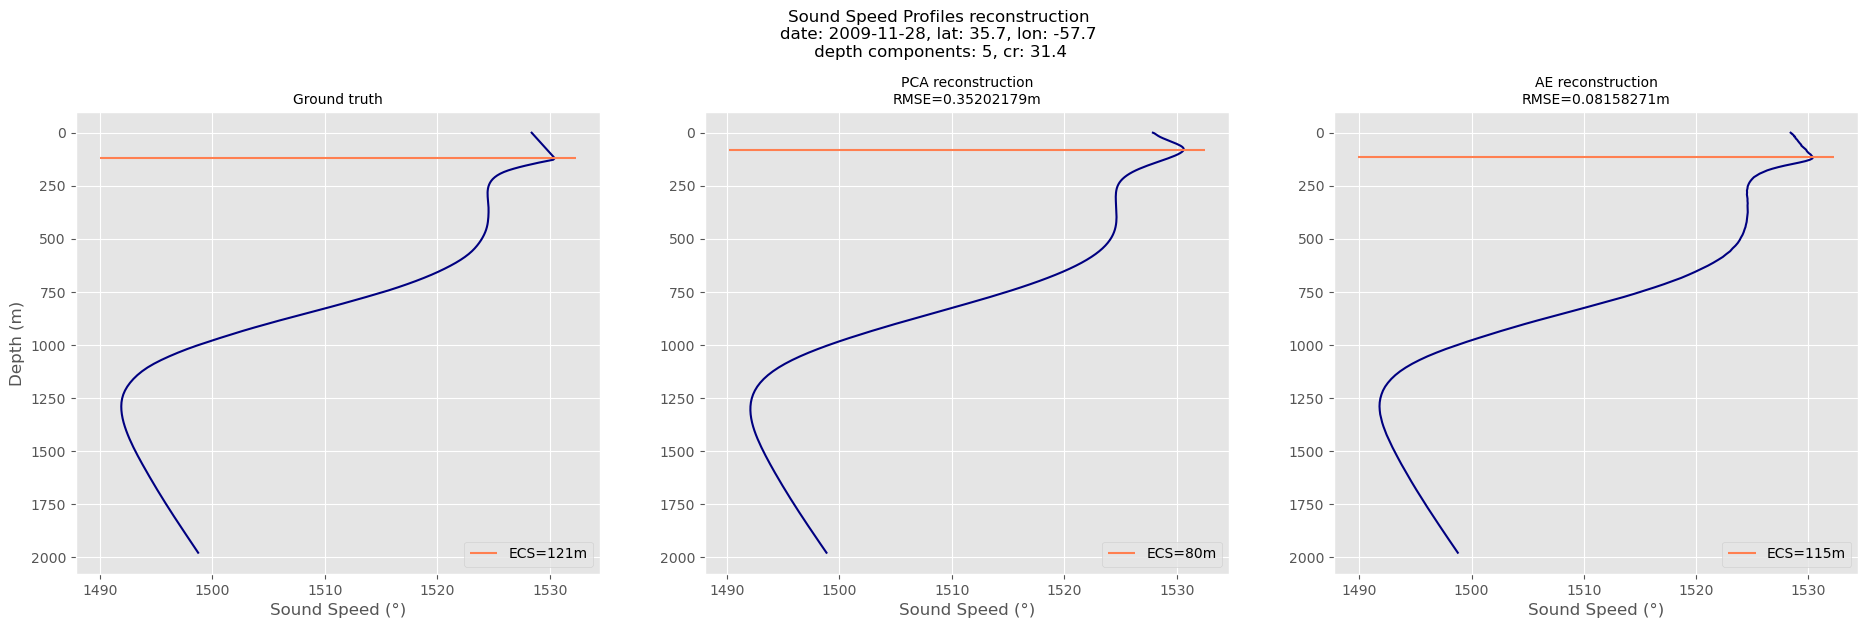

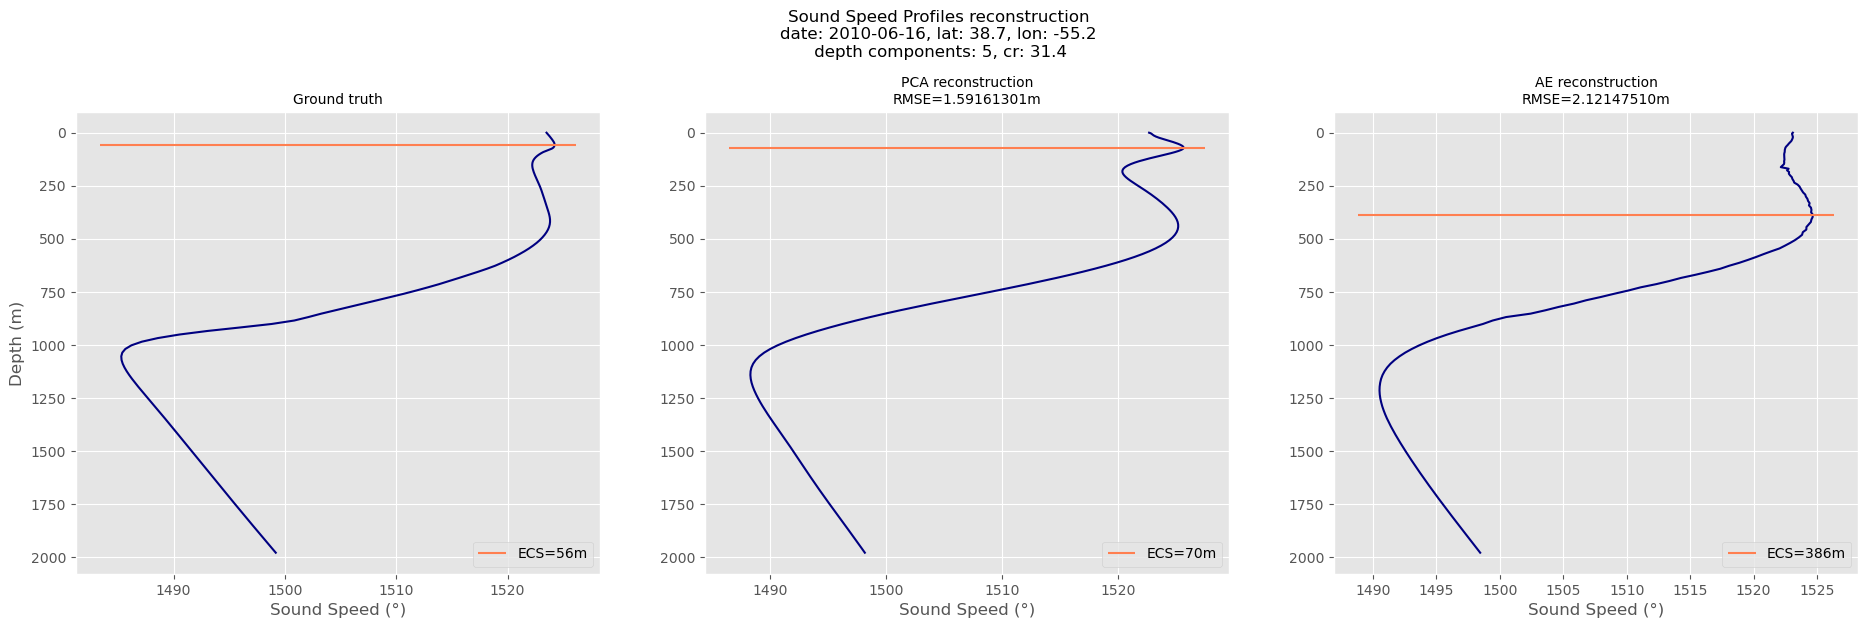

  0%|          | 0/1 [00:00<?, ?it/s]


 Odyssey private o23gauvr code FASCINATION outputs visualisation plot  1D 1D  30  epochs  grad  1 checkpoints val  loss=22.13-epoch=25.ckpt
Loading model, generating AE output


/Odyssey/private/o23gauvr/miniforge3/envs/fsc_env/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:541: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


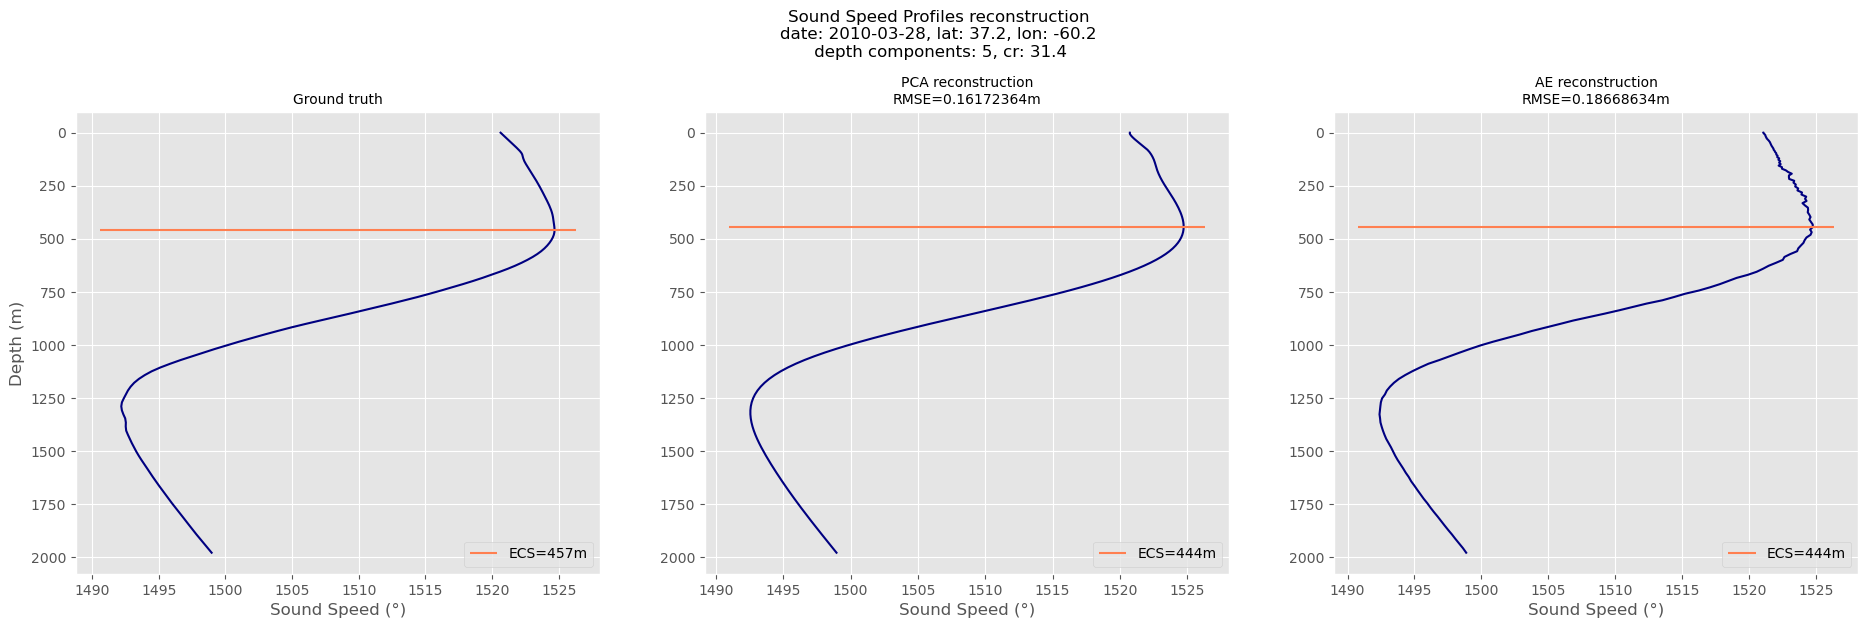

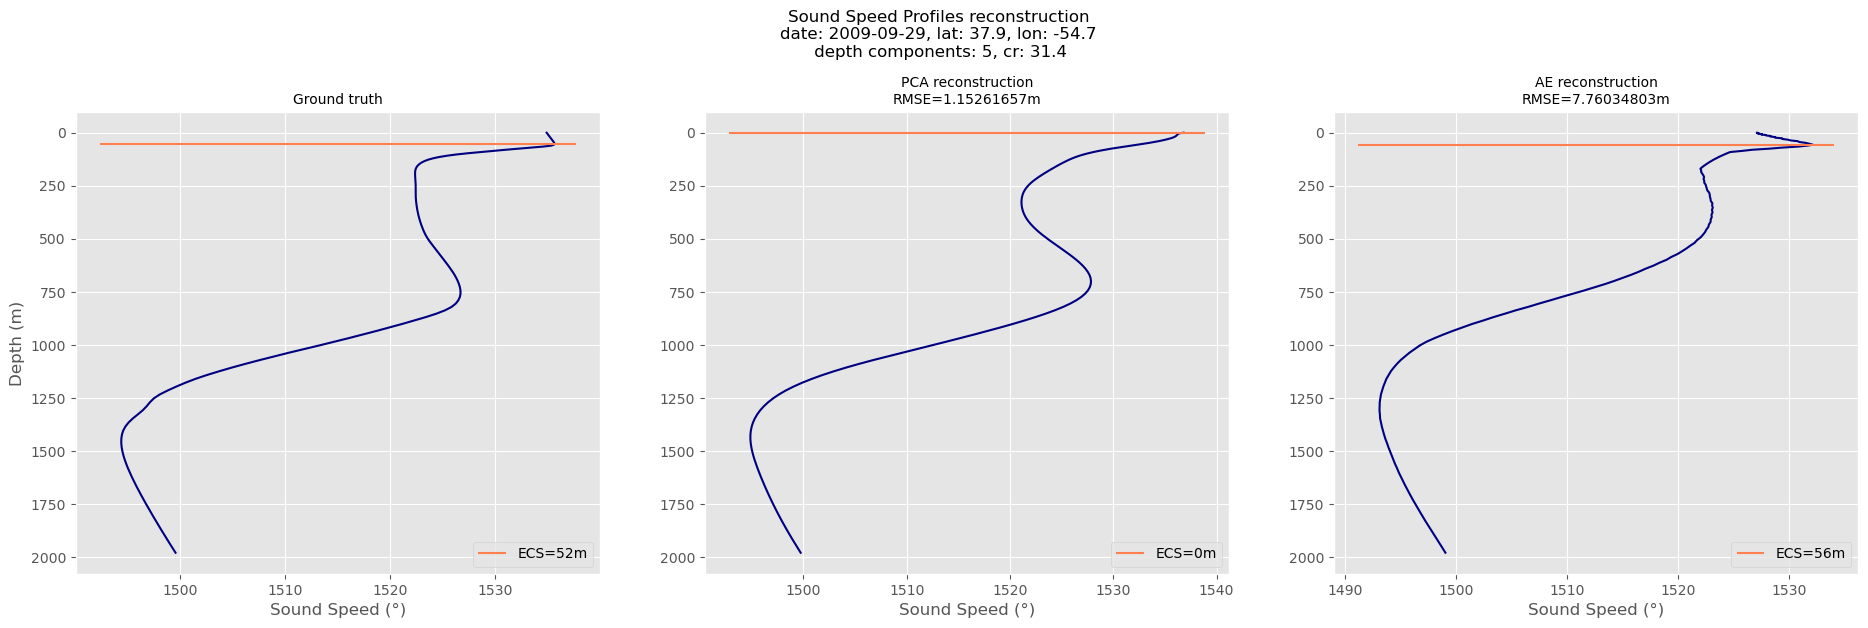

100%|██████████| 1/1 [00:17<00:00, 17.08s/it]


In [9]:
verbose = True

for model_carac in ckpt_dict.keys():
    ckpt_list = list(Path(ckpt_dict[model_carac]).rglob('*.ckpt'))

    for ckpt_path in tqdm(ckpt_list):
        ckpt_path = str(ckpt_path)
        
        model_name = " ".join((ckpt_path.split("AE")[-1]).split("/")).replace("_", "  ")
        print(f"\n{model_name}")


        try:
            cfg = utils.get_cfg_from_ckpt_path(ckpt_path, pprint=False)
        except:
            print(f"Can't load config")
            continue

        if cfg.datamodule in list(dm_dict.keys()):
            dm = dm_dict[cfg.datamodule]
            test_ssp_arr, _ = utils.loading_datamodule_phase(dm, phase="test")
            test_ssp_tens = torch.tensor(test_ssp_arr, dtype=getattr(torch, cfg.dtype), device=device)
            pca = pca_dict[cfg.datamodule]
            train_pca = False
        else:
            if verbose:
                print("Initiating datamodule; Generating train and test datasets")
            dm = hydra.utils.call(cfg.datamodule)
            train_ssp_arr, test_ssp_arr, dm = utils.loading_datamodule(dm)
            test_ssp_tens = torch.tensor(test_ssp_arr, dtype=getattr(torch, cfg.dtype), device=device)
            dm_dict[cfg.datamodule] = dm
            train_pca = True

        input_test_shape = test_ssp_tens.shape
        depth_array = dm.depth_array

        if verbose:
            print("Loading model, generating AE output")

        try:
            lit_model = utils.load_model(ckpt_path, dm, test_ssp_tens, verbose=True)
        except:
            print(f"Can't load model")
            continue

        ssp_ae_test_arr = lit_model(test_ssp_tens).detach().cpu().numpy().astype(test_ssp_arr.dtype)

        cr = lit_model.model_AE.cr

        if dm.norm_stats["norm_location"] == "datamodule":
            test_ssp_arr = utils.unorm_ssp_arr_3D(test_ssp_arr, dm)
            ssp_ae_test_arr = utils.unorm_ssp_arr_3D(ssp_ae_test_arr, dm)


        n_components = lit_model.model_AE.bottleneck_shape[1]
        if train_pca:
            if verbose:
                print("Fitting PCA")
            pca = PCA(n_components = n_components, svd_solver = 'auto')
            pca.fit(train_ssp_arr)
            pca_dict[cfg.datamodule] = pca
            pca_test_arr = pca.inverse_transform(pca.transform(test_ssp_arr))

        
        mse = ((test_ssp_arr - ssp_ae_test_arr) ** 2).mean(axis=1)
        min_mse_idx = mse.argmin()
        max_mse_idx = mse.argmax()

        min_coords = dm.test_da.profiles.data[min_mse_idx]
        max_coords = dm.test_da.profiles.data[max_mse_idx]

        plot_profile(test_ssp_arr[min_mse_idx], ssp_ae_test_arr[min_mse_idx], pca_test_arr[min_mse_idx], depth_array, n_components, min_coords)
        plot_profile(test_ssp_arr[max_mse_idx], ssp_ae_test_arr[max_mse_idx], pca_test_arr[max_mse_idx], depth_array, n_components, max_coords)
        plt.show()